# **DecisionTree_mnist**

In [1]:
from keras.datasets import mnist

import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

Using TensorFlow backend.


In [2]:
# 랜덤시드 설정(매번 같은 결과를 보기 위해서)
# keras를 이용해서 mnist data 불러옴

seed = 42
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# data 전처리. 1과0으로 binary로 만든 후에, (1, 784)로 shape을 맞춰줌. (DecisionTreeClassifier에 들어가려면 이 형식을 맞춰줘야한다)

ret, X_train = cv2.threshold(x_train, 100, 1, cv2.THRESH_BINARY)
ret_2, X_test = cv2.threshold(x_test, 100, 1, cv2.THRESH_BINARY)
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [4]:
# 최대 깊이를 10으로 설정하고, fit함수를 이용해 학습시킴.

clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [5]:
# test data를 넣어서 accuracy를 측정함 

predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print('accuracy : ', accuracy)

accuracy :  0.8515


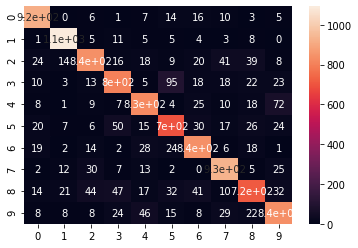

In [6]:
# confusion matrix를 그려봄

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

In [0]:
# 랜덤으로 숫자 하나를 골라서 실제로 decisiontree가 예측한 값과 실제를 비교해 봄

results = clf.predict(X_test[150].reshape(-1, 784))

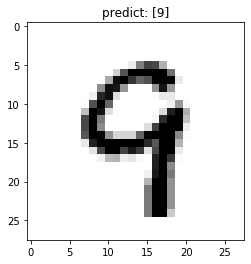

In [8]:
# random forest가 예측한 값과 실제 이미지 출력
plt.imshow(x_test[150], cmap='binary')
plt.title('predict: ' + str(results))
plt.show()

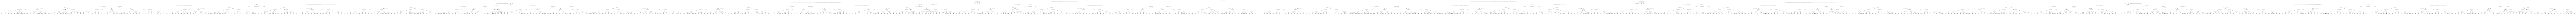

In [10]:
# decisiontree를 그래프로 그려봄

import io
import pydot

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(clf)